Autoencoder

In [7]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np 
encoding_dim = 3

x_train=np.array([[1,2,3],[1,2,3],[1,2,3],[1,2,3],[1,2,3],[1,2,3],[1,2,3],[1,2,3],[1,2,3]])
input= Input(shape=(3,))
encoded = Dense(encoding_dim, activation='relu')(input)
decoded = Dense(3, activation='linear')(encoded)

autoencoder = Model(input, decoded)
autoencoder.compile(optimizer='adadelta', loss='mse')

autoencoder.fit(x_train, x_train, epochs=500, batch_size=4)
autoencoder.predict(x_train)

Epoch 1/500
9/9 [==============================] - 0s - loss: 4.6655     
Epoch 2/500
9/9 [==============================] - 0s - loss: 4.6600     
Epoch 3/500
9/9 [==============================] - 0s - loss: 4.6545     
Epoch 4/500
9/9 [==============================] - 0s - loss: 4.6489     
Epoch 5/500
9/9 [==============================] - 0s - loss: 4.6432     
Epoch 6/500
9/9 [==============================] - 0s - loss: 4.6376     
Epoch 7/500
9/9 [==============================] - 0s - loss: 4.6319     
Epoch 8/500
9/9 [==============================] - 0s - loss: 4.6261     
Epoch 9/500
9/9 [==============================] - 0s - loss: 4.6204     
Epoch 10/500
9/9 [==============================] - 0s - loss: 4.6146     
Epoch 11/500
9/9 [==============================] - 0s - loss: 4.6089     
Epoch 12/500
9/9 [==============================] - 0s - loss: 4.6031     
Epoch 13/500
9/9 [==============================] - 0s - loss: 4.5973     
Epoch 14/500
9/9 [================

array([[ 0.78106612,  0.94453621,  1.00581455],
       [ 0.78106612,  0.94453621,  1.00581455],
       [ 0.78106612,  0.94453621,  1.00581455],
       [ 0.78106612,  0.94453621,  1.00581455],
       [ 0.78106612,  0.94453621,  1.00581455],
       [ 0.78106612,  0.94453621,  1.00581455],
       [ 0.78106612,  0.94453621,  1.00581455],
       [ 0.78106612,  0.94453621,  1.00581455],
       [ 0.78106612,  0.94453621,  1.00581455]], dtype=float32)

GAN MODEL


In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math
import pandas as pd

In [2]:
import gzip
import sys
import pickle
f = gzip.open('C:/Users/Sumit Pandey/Documents/Blockchain/Tutorial/MNIST_data/data/mnist.pkl.gz', 'rb')
if sys.version_info < (3,):
    data = pickle.load(f)
else:
    data = pickle.load(f, encoding='bytes')
f.close()
(x_train, y_train), (x_test, y_test) = data
X_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
X_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255


y_train = pd.get_dummies(y_train,columns=[0])
y_train = np.array(y_train, dtype='float32')

y_test = pd.get_dummies(y_test,columns=[0])
y_test = np.array(y_test, dtype='float32')

In [3]:
import numpy as np

def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [4]:
import pickle as pkl
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
def model_inputs(real_dim, z_dim):
    inputs_real = tf.placeholder(tf.float32, (None, real_dim), name="inputs_real")
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name="inputs_z")
    
    return inputs_real, inputs_z

In [6]:

def generator(z, out_dim, n_units=128, reuse=False,  alpha=0.01):
    with tf.variable_scope('generator', reuse=reuse):
        # Hidden layer
        h1 = tf.layers.dense(z, n_units, activation=None)
        # Leaky ReLU
        h1 = tf.maximum(h1, alpha*h1)
        
        # Logits and tanh output
        logits = tf.layers.dense(h1, out_dim, activation=None)
        out = tf.nn.tanh(logits)
        
        return out, logits

In [7]:
def discriminator(x, n_units=128, reuse=False, alpha=0.01):
    with tf.variable_scope('discriminator', reuse=reuse):
        # Hidden layer
        h1 = tf.layers.dense(x, n_units, activation=None)
        # Leaky ReLU
        h1 = tf.maximum(h1, alpha*h1)
        
        logits = tf.layers.dense(h1, 1, activation=None)
        out = tf.nn.sigmoid(logits)
        
        return out, logits

In [8]:
input_size = 784 
z_size = 100
g_hidden_size = 128
d_hidden_size = 128
alpha = 0.01 
smooth = 0.1

In [9]:
tf.reset_default_graph()
input_real, input_z = model_inputs(input_size, z_size)
g_model, g_logits = generator(input_z, input_size, g_hidden_size, reuse=False,  alpha=alpha)
d_model_real, d_logits_real = discriminator(input_real, d_hidden_size, reuse=False, alpha=alpha)
d_model_fake, d_logits_fake = discriminator(g_model, d_hidden_size, reuse=True, alpha=alpha)

In [10]:
d_labels_real = tf.ones_like(d_logits_real) * (1 - smooth)
d_labels_fake = tf.zeros_like(d_logits_fake)

d_loss_real = tf.nn.sigmoid_cross_entropy_with_logits(labels=d_labels_real, logits=d_logits_real)
d_loss_fake = tf.nn.sigmoid_cross_entropy_with_logits(labels=d_labels_fake, logits=d_logits_fake)

d_loss = tf.reduce_mean(d_loss_real + d_loss_fake)

g_loss = tf.reduce_mean(
    tf.nn.sigmoid_cross_entropy_with_logits(
        labels=tf.ones_like(d_logits_fake), 
        logits=d_logits_fake))

In [11]:
learning_rate = 0.002
t_vars = tf.trainable_variables()
g_vars = [var for var in t_vars if var.name.startswith("generator")]
d_vars = [var for var in t_vars if var.name.startswith("discriminator")]

d_train_opt = tf.train.AdamOptimizer().minimize(d_loss, var_list=d_vars)
g_train_opt = tf.train.AdamOptimizer().minimize(g_loss, var_list=g_vars)

In [16]:
batch_size = 100
epochs = 100
samples = []
losses = []
saver = tf.train.Saver(var_list = g_vars)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for e in range(epochs):
        for ii in range(len(X_train)//batch_size):
            batch = next_batch(batch_size, X_train, y_train)
            
            batch_images = batch[0].reshape((batch_size, 784))
            batch_images = batch_images*2 - 1
            
            batch_z = np.random.uniform(-1, 1, size=(batch_size, z_size))
            
            _ = sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z})
            _ = sess.run(g_train_opt, feed_dict={input_z: batch_z})
        
        train_loss_d = sess.run(d_loss, {input_z: batch_z, input_real: batch_images})
        train_loss_g = g_loss.eval({input_z: batch_z})
            
        print("Epoch {}/{}...".format(e+1, epochs),
              "Discriminator Loss: {:.4f}...".format(train_loss_d),
              "Generator Loss: {:.4f}".format(train_loss_g))    

        losses.append((train_loss_d, train_loss_g))
        
        sample_z = np.random.uniform(-1, 1, size=(16, z_size))
        gen_samples = sess.run(
                       generator(input_z, input_size, reuse=True),
                       feed_dict={input_z: sample_z})
        samples.append(gen_samples)
        saver.save(sess, 'C:/Users/Sumit Pandey/Documents/Blockchain/Tutorial/generator.ckpt')

with open('train_samples.pkl', 'wb') as f:
    pkl.dump(samples, f)

Epoch 1/100... Discriminator Loss: 0.3526... Generator Loss: 3.8530
Epoch 2/100... Discriminator Loss: 0.3800... Generator Loss: 3.3978
Epoch 3/100... Discriminator Loss: 0.4470... Generator Loss: 3.5290
Epoch 4/100... Discriminator Loss: 0.5704... Generator Loss: 2.8575
Epoch 5/100... Discriminator Loss: 0.9447... Generator Loss: 3.3117
Epoch 6/100... Discriminator Loss: 1.0661... Generator Loss: 2.1796
Epoch 7/100... Discriminator Loss: 0.6800... Generator Loss: 3.0268
Epoch 8/100... Discriminator Loss: 0.7521... Generator Loss: 2.1765
Epoch 9/100... Discriminator Loss: 0.5879... Generator Loss: 3.1100
Epoch 10/100... Discriminator Loss: 0.9922... Generator Loss: 3.5565
Epoch 11/100... Discriminator Loss: 1.4525... Generator Loss: 2.0771
Epoch 12/100... Discriminator Loss: 1.5680... Generator Loss: 0.9652
Epoch 13/100... Discriminator Loss: 1.2182... Generator Loss: 2.1922
Epoch 14/100... Discriminator Loss: 1.0846... Generator Loss: 2.3787
Epoch 15/100... Discriminator Loss: 1.8940.

In [17]:
import matplotlib.pyplot as plt

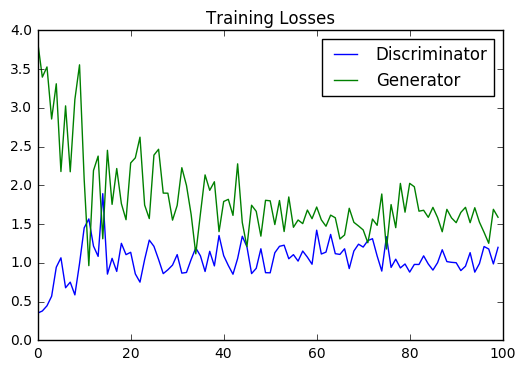

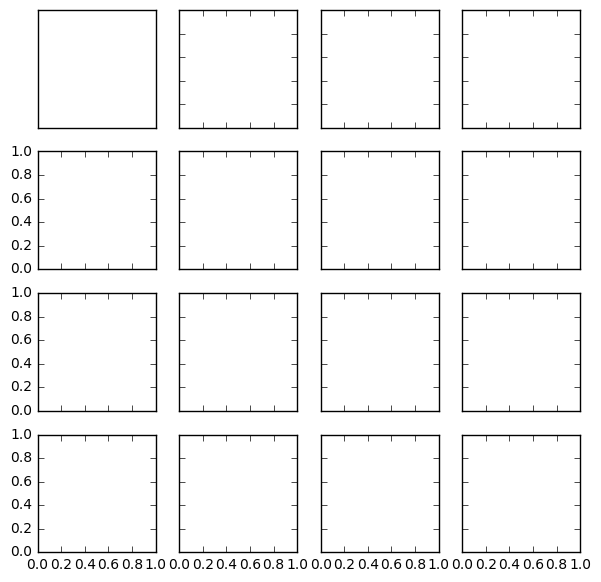

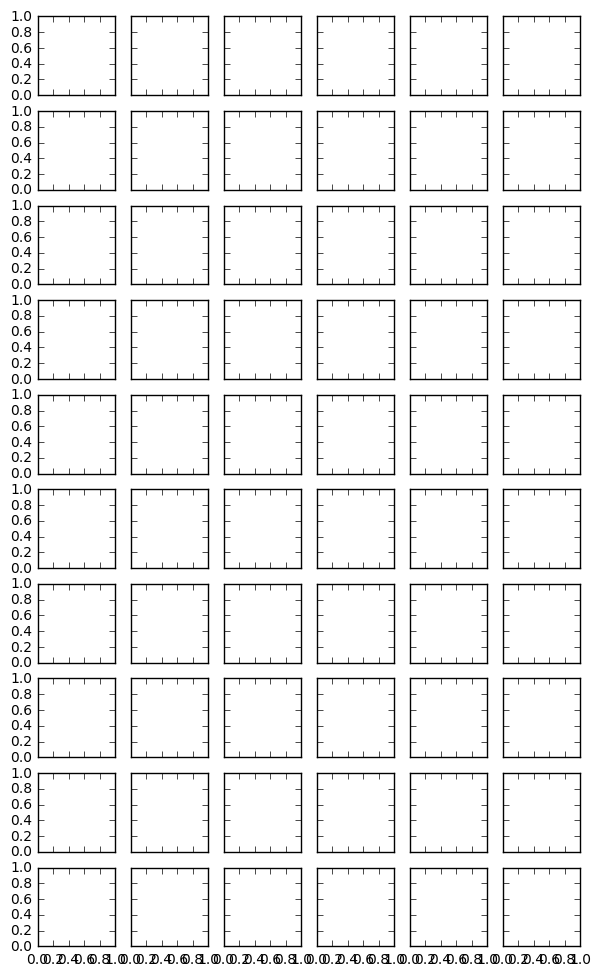

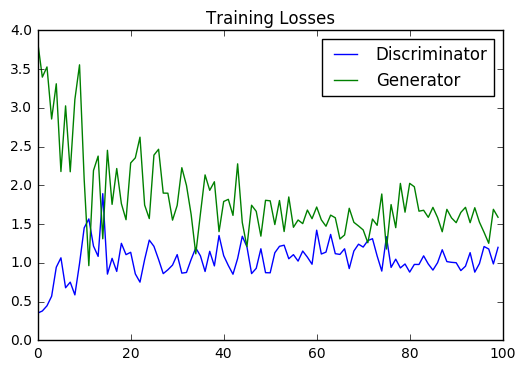

In [23]:
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='Discriminator')
plt.plot(losses.T[1], label='Generator')
plt.title("Training Losses")
plt.legend()
plt.show()

In [34]:
def view_samples(epoch, samples):
    fig, axes = plt.subplots(figsize=(7,7), nrows=4, ncols=4, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples[epoch]):
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(img.reshape((112,112)), cmap='Greys_r')
    
    return fig, axes

In [35]:
with open('train_samples.pkl', 'rb') as f:
    samples = pkl.load(f)

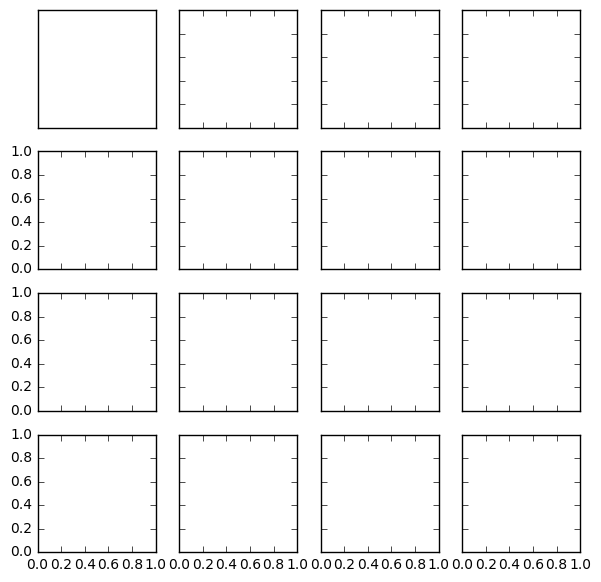

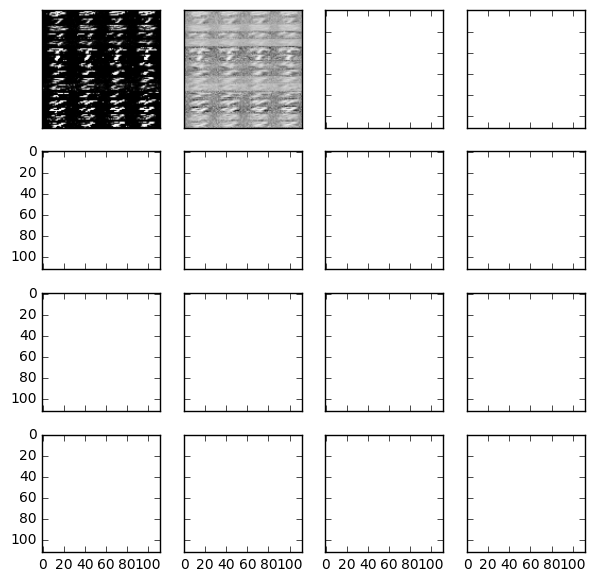

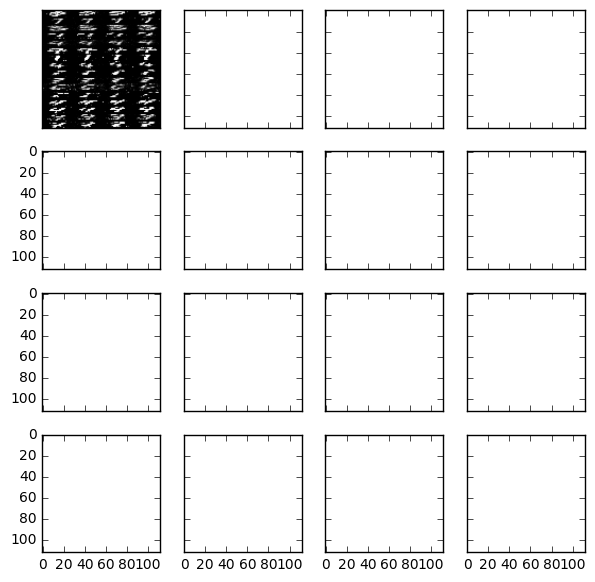

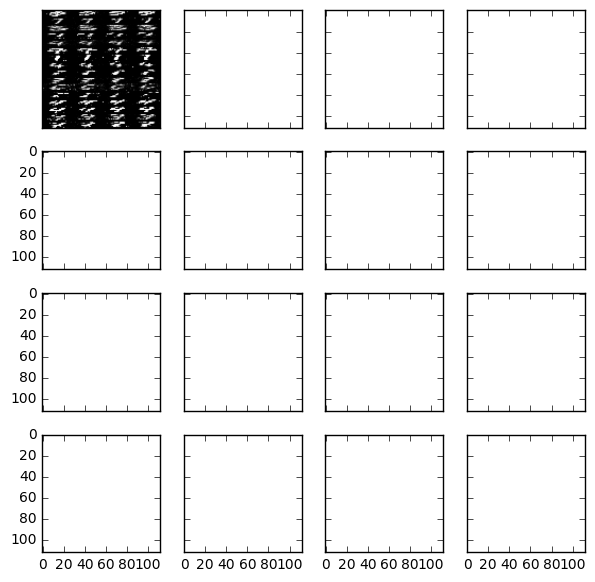

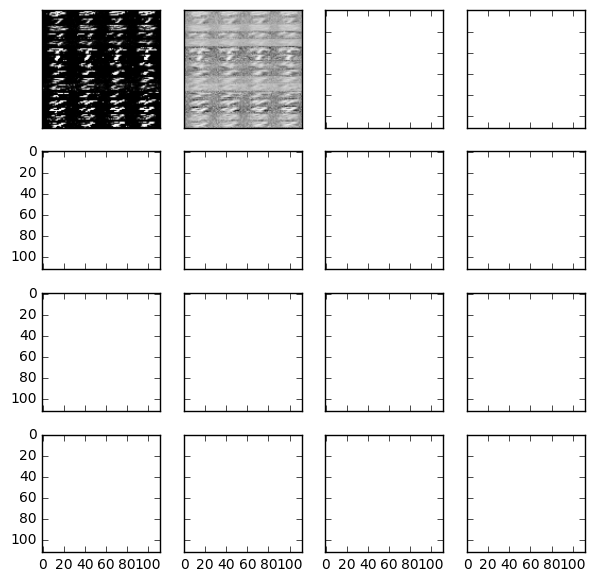

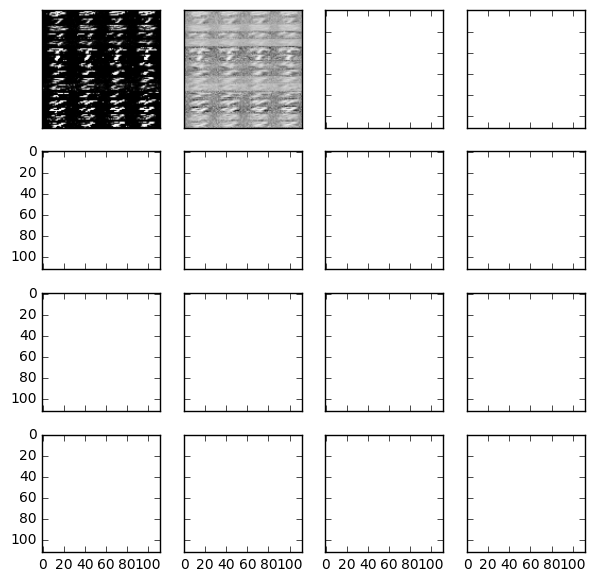

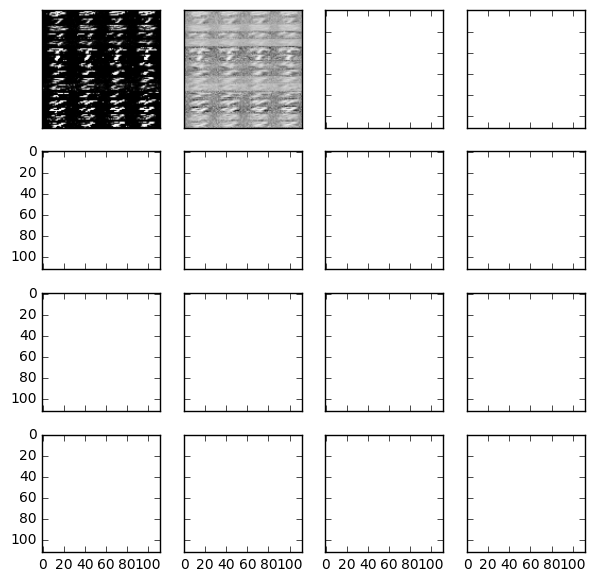

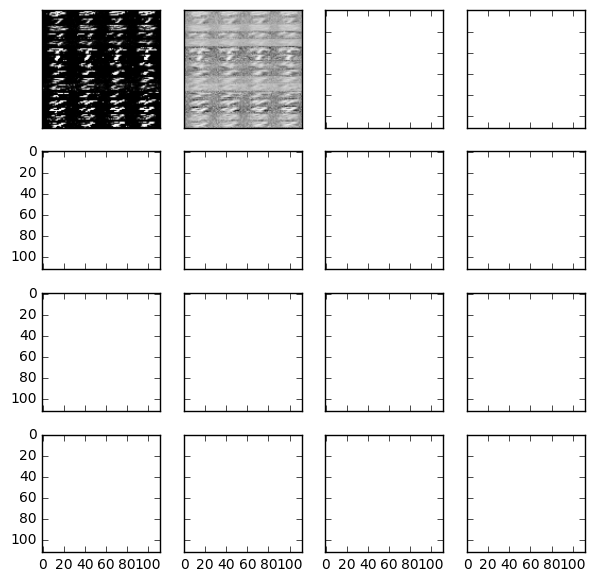

In [39]:
_ = view_samples(-1, samples)
plt.show()